In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

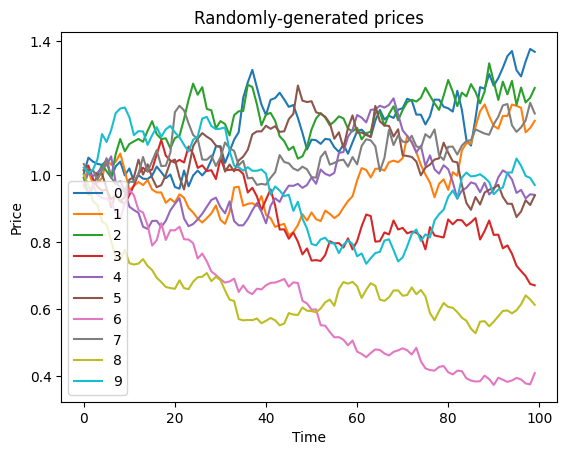

In [3]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

#### pandas Data Structure

A pandas Series is a 1-dimensional array with labels that can contain any data type. We primarly use them for handling time series data.

In [4]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [5]:
print(s.name)

None


In [6]:
s.name = "Toy Series"
print(s.name)

Toy Series


In [7]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


In [8]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [9]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [10]:
print(s)

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Toy Series, dtype: float64


##### Accessing Series Elements

In [11]:
print("First element of the Series:", s.iloc[0])
print("Last element of the Series:", s.iloc[len(s)-1])

First element of the Series: 1.0
Last element of the Series: 5.0


In [12]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

In [13]:
start = 0
end = len(s)
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Toy Series, dtype: float64

In [14]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

Slice of the Series that starts from the second to last element and ends at the third to last element, taking steps of size 1.

In [15]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

In [16]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

With `Series`, we can just use the square brakets ([]) to access elements, but this is not best practice. The brakets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

You can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values. 

In [17]:
print(s < 3) 

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


In [18]:
print(s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~`.

In [19]:
print(s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


#### Indexing and Time Series

To handle the time component we use `Timestamp` objects. We use our `get_pricing()` method to complete with all the appropriate labels a full time series.  

In [20]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = yf.download(symbol, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [21]:
prices

Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
                 ...    
2015-12-24    495.100006
2015-12-28    493.519989
2015-12-29    489.940002
2015-12-30    485.790009
2015-12-31    479.850006
Name: Adj Close, Length: 1006, dtype: float64

In [22]:
print("\n", type(prices))
prices.head(5)


 <class 'pandas.core.series.Series'>


Date
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-09    339.739990
Name: Adj Close, dtype: float64

In [23]:
print('Old name:', prices.name)
prices.name = symbol
print('New name', prices.name)

Old name: Adj Close
New name CMG


In [24]:
print(prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)


Notice that this DatetimeIndex has a collection of associated information. In particular it has an associated frquency (`freq`). The freq. indicates whether the data is daily vs monthly vs some other period. 
If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because of markets days. Let's use `resample()` method.

In [25]:
monthly_prices = prices.resample('M').mean()
monthly_prices.head(10)

Date
2012-01-31    354.829002
2012-02-29    379.535503
2012-03-31    407.002272
2012-04-30    422.798997
2012-05-31    405.805456
2012-06-30    403.033335
2012-07-31    353.880474
2012-08-31    294.535219
2012-09-30    326.513160
2012-10-31    276.573333
Freq: M, Name: CMG, dtype: float64

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [26]:
monthly_prices_med = prices.resample('M').agg('median')
monthly_prices_med.head(10)

Date
2012-01-31    355.505005
2012-02-29    378.195007
2012-03-31    408.994995
2012-04-30    420.835007
2012-05-31    405.240005
2012-06-30    402.450012
2012-07-31    380.470001
2012-08-31    295.390015
2012-09-30    332.809998
2012-10-31    286.559998
Freq: M, Name: CMG, dtype: float64

Here we create a custom resampler function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [27]:
def custom_resampler(array_like):
    """" Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').agg(custom_resampler)
first_of_month_prices.head(10)

Date
2012-01-31    341.269989
2012-02-29    370.410004
2012-03-31    394.100006
2012-04-30    418.399994
2012-05-31    419.890015
2012-06-30    397.140015
2012-07-31    383.459991
2012-08-31    280.670013
2012-09-30    285.989990
2012-10-31    316.130005
Freq: M, Name: CMG, dtype: float64

We can adjust the timezone of a Series to adapt the time of real-world data. In our case, our time series is already localizated to UTC, but let's say that we want to adjust the time to be US/Eastern. In this case we use the `tz_convert()` method.

In [28]:
eastern_prices = prices.tz_localize('US/Eastern')
eastern_prices.head(10)

Date
2012-01-03 00:00:00-05:00    341.269989
2012-01-04 00:00:00-05:00    348.750000
2012-01-05 00:00:00-05:00    350.480011
2012-01-06 00:00:00-05:00    348.950012
2012-01-09 00:00:00-05:00    339.739990
2012-01-10 00:00:00-05:00    341.119995
2012-01-11 00:00:00-05:00    347.600006
2012-01-12 00:00:00-05:00    347.619995
2012-01-13 00:00:00-05:00    354.619995
2012-01-17 00:00:00-05:00    353.380005
Name: CMG, dtype: float64

`reindex()` method used to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value.

In [29]:
# Let's create a new DatetimeIndex that contains all that we want
calendar_dates = pd.date_range(start=start, end=end, freq='D')
print(calendar_dates)

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns]', length=1462, freq='D')


In [30]:
# Now we use this set of dates to reindex the time series. We tell the function 
# that the fill method that we want is ffill. This denotes "forward fill".
# Any NaN value will be filled by the last value listed.

calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(10)

2012-01-01           NaN
2012-01-02           NaN
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
Freq: D, Name: CMG, dtype: float64

There are still a couple of `NaN` values right at the beginning of the time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled.

#### Missing Data

In [31]:
# Filling NaN values with the mean of the prices of the entire data set.
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01    501.068185
2012-01-02    501.068185
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
Freq: D, Name: CMG, dtype: float64

In [32]:
# Filling NaN values with the next filled value of the prices.
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01    341.269989
2012-01-02    341.269989
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
Freq: D, Name: CMG, dtype: float64

In [33]:
# These solutions are not a good idea, taking future data for the present. Instead let's try to drop
# the missing data using the dropna() method.
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
2012-01-11    347.600006
2012-01-12    347.619995
Freq: D, Name: CMG, dtype: float64

#### Time Series Analysis with pandas

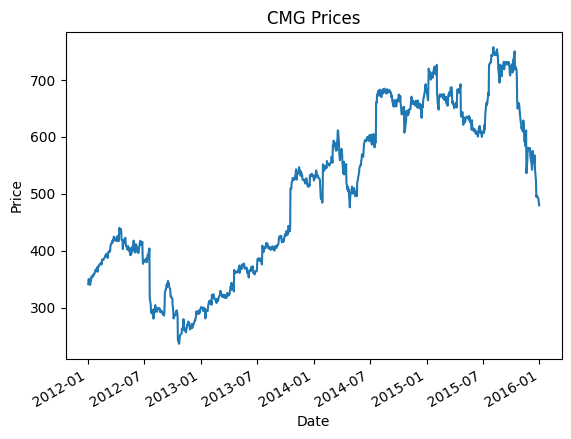

In [34]:
prices.plot();
# We still need to add the axis labels and title
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

In [35]:
# built-in descriptive statistics. We can either calculate these individuals or using the describe() method.
print("Mean", prices.mean())
print("Standard deviation:", prices.std())

Mean 501.63665038880487
Standard deviation: 146.68873796090153


In [36]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
count    1006.000000
mean      501.636650
std       146.688738
min       236.240005
25%       371.555000
50%       521.270020
75%       646.834991
max       757.770020
Name: CMG, dtype: float64


In [37]:
# We can modify Series with scalar using basic math operators.
modified_prices = prices * 2 - 10
modified_prices.head(5)

Date
2012-01-03    672.539978
2012-01-04    687.500000
2012-01-05    690.960022
2012-01-06    687.900024
2012-01-09    669.479980
Name: CMG, dtype: float64

In [38]:
# We can also create linear combinations of Series themselves using the basic mathematical operators.
# pandas will group up matching indices and perform the calculations elementwise to produce a new Series.
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

Date
2012-01-03    376.177011
2012-01-04    366.122007
2012-01-05    353.756360
2012-01-06    329.317362
2012-01-09    366.223666
dtype: float64

If there are no matching indices, however, we may get an empty Series in return.

In [39]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00   NaN
2012-01-04 00:00:00   NaN
2012-01-05 00:00:00   NaN
2012-01-06 00:00:00   NaN
2012-01-09 00:00:00   NaN
dtype: float64

In [40]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

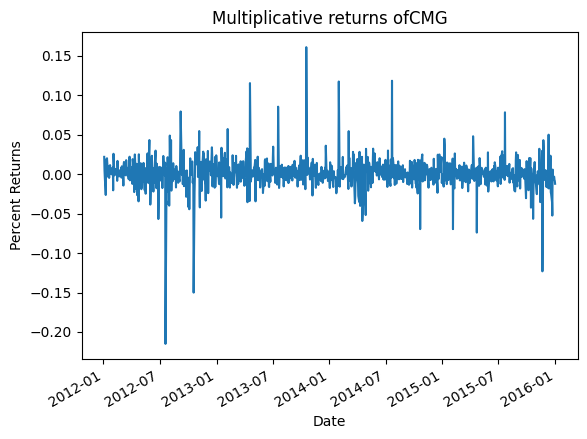

In [41]:
plt.title("Multiplicative returns of" + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations.

In [42]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

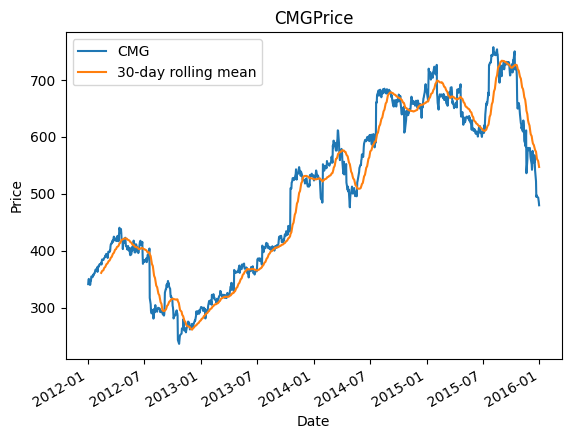

In [43]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

In [44]:
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

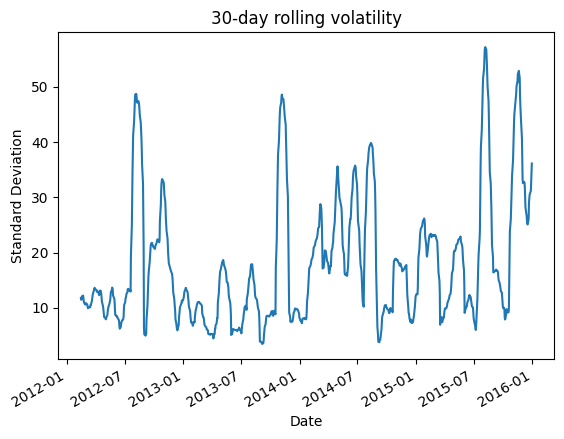

In [45]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays. 

In [46]:
print(np.median(mult_returns))

0.00023590204910717283


The majority of these functions are implemented directly as `Series` and `DataFrame` method.

In [48]:
print(mult_returns.median())

0.00023590204910717283


#### DataFrames

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure.

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the pandas documentation on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [49]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print(dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([ 0.40599639, -0.40421957,  0.48987519,  0.1007572 ,  0.19734903])}


In [50]:
# Each DataFrame has a few key attributes: index is one of the first.
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print(frame_data)

            a  b         c
2016-01-01  1  L  0.405996
2016-01-02  2  K -0.404220
2016-01-03  3  J  0.489875
2016-01-04  4  M  0.100757
2016-01-05  5  Z  0.197349
